Mounted at /content/drive
[[1602  171]
 [ 171 1573]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1773
           1       0.90      0.90      0.90      1744

    accuracy                           0.90      3517
   macro avg       0.90      0.90      0.90      3517
weighted avg       0.90      0.90      0.90      3517



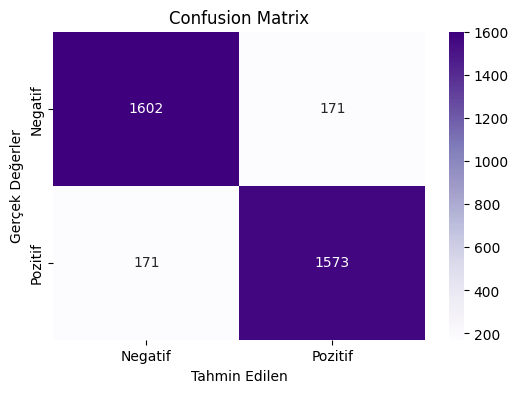

En iyi parametreler: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Fold 1 doğruluk skorları: [0.88517597 0.89228582 0.88766442 0.88517597 0.89228582 0.88766442
 0.88517597 0.89264131 0.88091006 0.88517597 0.88446498 0.5211518
 0.88339851 0.90010665 0.89726271 0.88339851 0.90010665 0.89726271
 0.88339851 0.90010665 0.89406328 0.88339851 0.88766442 0.67401351
 0.88339851 0.89655172 0.89797369 0.88339851 0.89655172 0.89797369
 0.88339851 0.89655172 0.89477426 0.88339851 0.88944188 0.83825098
 0.88339851 0.89904017 0.90046214 0.88339851 0.89904017 0.90046214
 0.88339851 0.90010665 0.89939566 0.88339851 0.89619623 0.88091006]
Fold 2 doğruluk skorları: [0.89050835 0.89264131 0.89370779 0.89050835 0.89264131 0.89441877
 0.89050835 0.89335229 0.88659794 0.89050835 0.88801991 0.5211518
 0.89086385 0.89975116 0.90437256 0.89086385 0.89975116 0.90401706
 0.89086385 0.89868468 0.90188411 0.89086385 0.89121934 0.66157128
 0.89050835 0.90259509 0.90401706 0.89050835 0.90259509 0.90401706
 0.8905083

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Datasets/diabetes_new.csv'
data = pd.read_csv(data_path)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = SVC() #default değerleri: kernel='rbf', c=1.0, degree=3, gamma='scale'
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
rapor = classification_report(y_test, y_pred)
print(cm)
print(rapor)


import seaborn as sns


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değerler")
plt.title("Confusion Matrix")

plt.show()


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)
print("En iyi parametreler:", grid_search.best_params_)

mean_test_scores = grid_search.cv_results_['mean_test_score']
split_test_scores = [grid_search.cv_results_[f'split{i}_test_score'] for i in range(5)]

for i, scores in enumerate(split_test_scores):
    print(f"Fold {i+1} doğruluk skorları: {scores}")

print("\nOrtalama Test Doğruluk Skorları:")
print(mean_test_scores)


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1773
           1       0.91      0.90      0.91      1744

    accuracy                           0.91      3517
   macro avg       0.91      0.91      0.91      3517
weighted avg       0.91      0.91      0.91      3517



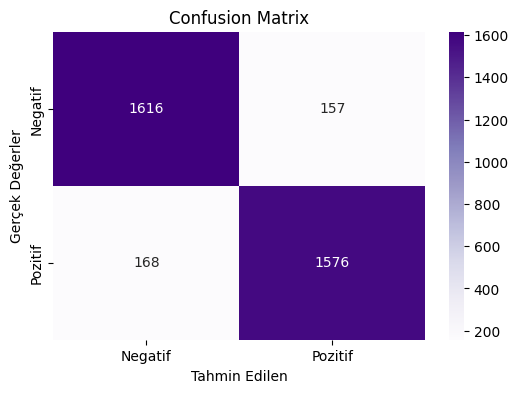

In [2]:
best_classifier = SVC(kernel='poly', C=10, degree=3, gamma='scale')
best_classifier.fit(X_train, y_train)
y_pred2 = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
rapor = classification_report(y_test, y_pred2)
print(rapor)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değerler")
plt.title("Confusion Matrix")

plt.show()

ROC AUC Skoru: 0.9706


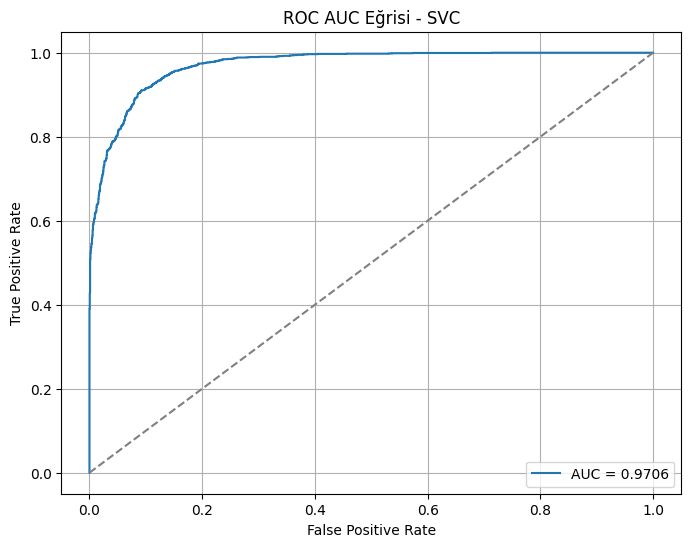

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
svc_model = SVC(kernel='poly', C=10, probability=True, degree=3, gamma='scale')
svc_model.fit(X_train, y_train)

y_scores = svc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


auc_score = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Skoru: {auc_score:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Eğrisi - SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()